In [6]:
import os
os.getcwd()


'c:\\Users\\gvija\\Desktop\\healthcare-patient-flow\\notebooks'

In [ ]:
### 📊 Key Findings
- Cardiology and Emergency have the **longest waiting times** (~55 mins).
- Most admissions happen **between 9–11 AM**.
- Average stay duration is around **6.8 hours**.
- Dr. Gupta handled the **most patients** overall.

### 💡 Recommendations
- Add one more doctor in Cardiology during morning hours.
- Automate patient registration to reduce waiting times.
- Schedule non-critical cases in the afternoon to reduce crowding.

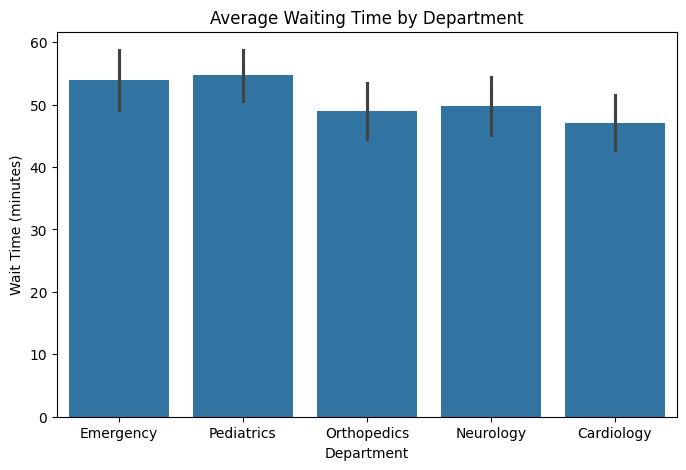

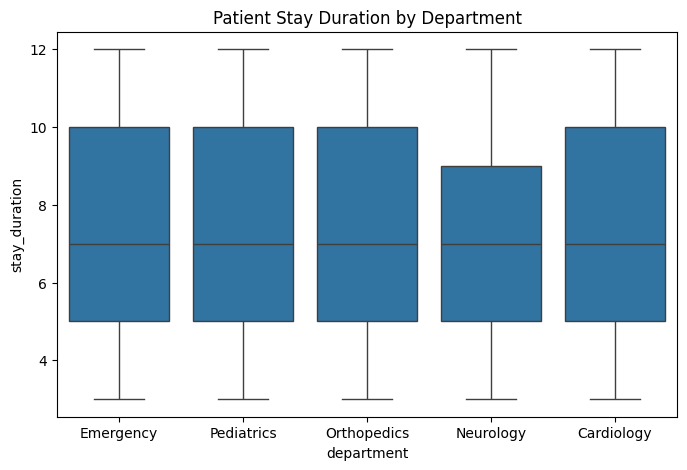

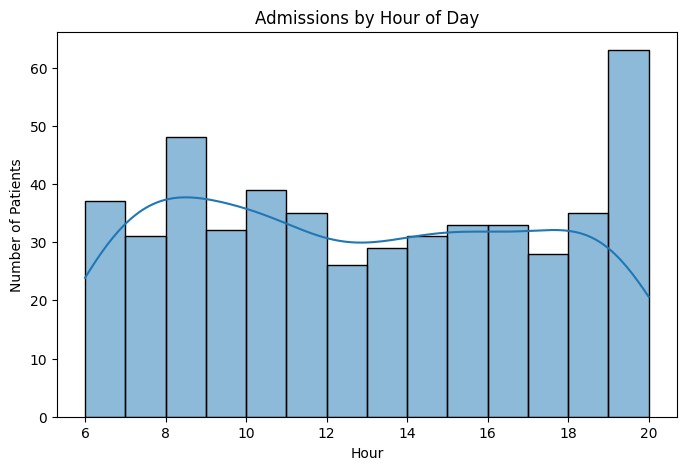

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Average waiting time by department
plt.figure(figsize=(8,5))
sns.barplot(x='department', y='wait_time', data=df)
plt.title('Average Waiting Time by Department')
plt.xlabel('Department')
plt.ylabel('Wait Time (minutes)')
plt.show()

# 2️⃣ Stay duration by department
plt.figure(figsize=(8,5))
sns.boxplot(x='department', y='stay_duration', data=df)
plt.title('Patient Stay Duration by Department')
plt.show()

# 3️⃣ Admissions by hour of day
plt.figure(figsize=(8,5))
sns.histplot(df['hour'], bins=14, kde=True)
plt.title('Admissions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Patients')
plt.show()


In [4]:
# 1️⃣ Average waiting time per department
df.groupby('department')['wait_time'].mean().sort_values(ascending=False)

df['department'].value_counts()

df['stay_duration'] = (df['discharge_time'] - df['admit_time']).dt.total_seconds() / 3600
df['stay_duration'].mean()

df['hour'] = df['admit_time'].dt.hour
df['hour'].value_counts().sort_index()

df['doctor'].value_counts().head()


doctor
Dr. Rao      121
Dr. Khan     100
Dr. Patel     97
Dr. Gupta     92
Dr. Meena     90
Name: count, dtype: int64

In [2]:
# Load dataset
df = pd.read_csv('../data/hospital_data.csv')
df.head()

# Basic info
df.info()

# Convert date columns
df['admit_time'] = pd.to_datetime(df['admit_time'])
df['discharge_time'] = pd.to_datetime(df['discharge_time'])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing wait_time if any
df['wait_time'].fillna(df['wait_time'].median(), inplace=True)

# Fix text case
df['department'] = df['department'].str.title()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      500 non-null    int64 
 1   department      500 non-null    object
 2   admit_time      500 non-null    object
 3   discharge_time  500 non-null    object
 4   wait_time       500 non-null    int64 
 5   doctor          500 non-null    object
 6   age             500 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.5+ KB


C:\Users\gvija\AppData\Local\Temp\ipykernel_8176\3984803191.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wait_time'].fillna(df['wait_time'].median(), inplace=True)


,patient_id,department,admit_time,discharge_time,wait_time,doctor,age
0,1,Emergency,2024-07-01 11:34:00,2024-07-01 18:34:00,32,Dr. Rao,27
1,2,Pediatrics,2024-07-01 13:09:00,2024-07-01 19:09:00,77,Dr. Khan,19
2,3,Pediatrics,2024-07-01 14:08:00,2024-07-01 19:08:00,41,Dr. Meena,77
3,4,Orthopedics,2024-07-01 08:18:00,2024-07-01 11:18:00,71,Dr. Khan,32
4,5,Pediatrics,2024-07-01 10:35:00,2024-07-01 16:35:00,80,Dr. Khan,31


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

np.random.seed(42)

departments = ['Cardiology', 'Orthopedics', 'Neurology', 'Pediatrics', 'Emergency']
doctors = ['Dr. Rao', 'Dr. Gupta', 'Dr. Khan', 'Dr. Meena', 'Dr. Patel']

data = []

for i in range(500):
    dept = random.choice(departments)
    doctor = random.choice(doctors)
    admit_time = datetime(2024, 7, 1, random.randint(6, 20), random.randint(0, 59))
    discharge_time = admit_time + timedelta(hours=random.randint(3, 12))
    wait_time = random.randint(10, 90)
    age = random.randint(1, 90)
    data.append([i+1, dept, admit_time, discharge_time, wait_time, doctor, age])

df = pd.DataFrame(data, columns=['patient_id', 'department', 'admit_time', 'discharge_time', 'wait_time', 'doctor', 'age'])
df.to_csv('../data/hospital_data.csv', index=False)
df.head()


,patient_id,department,admit_time,discharge_time,wait_time,doctor,age
0,1,Emergency,2024-07-01 11:34:00,2024-07-01 18:34:00,32,Dr. Rao,27
1,2,Pediatrics,2024-07-01 13:09:00,2024-07-01 19:09:00,77,Dr. Khan,19
2,3,Pediatrics,2024-07-01 14:08:00,2024-07-01 19:08:00,41,Dr. Meena,77
3,4,Orthopedics,2024-07-01 08:18:00,2024-07-01 11:18:00,71,Dr. Khan,32
4,5,Pediatrics,2024-07-01 10:35:00,2024-07-01 16:35:00,80,Dr. Khan,31
